<a href="https://colab.research.google.com/github/MonitSharma/Learn-Machine-Learning-with-Me/blob/main/Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Introduction to PyTorch

Previously we learned how to make a neural network and train it. Here we will be taking a step back and review some of the basic component of building a deep learning models using PyTorch.


This is a brief tutorial and will not include severe complicated codes. Mostly include basic models with PyTorch.



# Getting Started

We will import a few modules that will ne useful to obtain the necessary functions that will help us to build our deep learning model. The main ones include `torch` and `torchvision` . They contain the majority of the functions that you need to get started with PyTorch. 

We will also need `torch.nn` , `torch.nn.functional` and `torchvision.transforms` which all contain utility functions to build our model.

In [1]:
# the generic imports

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# for plotting purposes

import matplotlib.pyplot as plt


# Loading the Data

As with any other ML project, we need to load the dataset.
We are using the most famous ML dataset i.e [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

The data consists the number of images of size $28 \times 28$ . We will load the data into batch size of $32$.

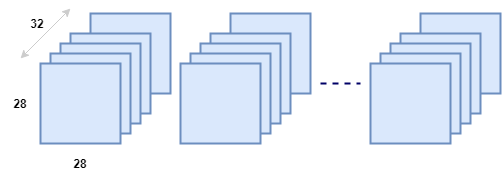





1.   We will import and transform the data into tensors using the `transforms` module.
2.   We will use `DataLoader` to build convenient data loaders, which make it easy to efficiently feed data in batches to deep learning models.
3.  We will also create batches of the data by setting the `batch` parameter inside the data loader. We can change to `64` if we like.



In [2]:
# parameter for the batch size
BATCH_SIZE = 32

# transformations
transform = transforms.Compose([transforms.ToTensor()])

# download and load the data
trainset = torchvision.datasets.MNIST(root='./data', train = True, download=True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size= BATCH_SIZE, shuffle = True, num_workers =2)

## downlaod and load the testinng dataset

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Inspect whtat the dataset contains

In [3]:
## print the trainset and testset
print(trainset)
print(testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


This is a beginner's tutorial so I will break down things a bit here:
- `BATCH_SIZE` is a parameter that denotes the batch size we will use for our model
- `transform` holds code for whatever transformations you will apply to your data. I will show you an example below to demonstrate exactly what it does to shed more light into its use
- `trainset` and `testset` contain the actual dataset object. Notice I use `train=True` to specify that this corresponds to the training dataset, and I use `train=False` to specify that this is the remainder of the dataset which we call the testset. From the portion I printed above you can see that the split of the data was 85% (60000) / 15% (10000), corresponding to the portions of samples for training set and testing set, respectively. 
- `trainloader` is what holds the data loader object which takes care of shuffling the data and constructing the batches.



Let's look at the `transforms.Compose(...)` function and see what it does. We will use a randomized image to demonstrate its use.  We will generate an image

In [4]:
image = transforms.ToPILImage(mode='L')(torch.randn(1,96,96))

How does it look?

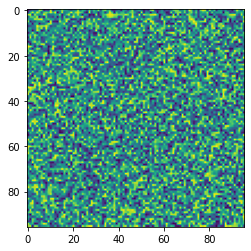

In [5]:
plt.imshow(image)

We will now apply the transformation in it. We will rotate by $45^\circ$. Let's see how to do this:

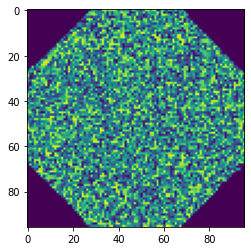

In [6]:
# test case
dummy_transform = transforms.Compose([transforms.RandomRotation(45)])


dummy_result = dummy_transform(image)

plt.imshow(dummy_result)

We can put the transformations withinn `transforms.Compose(...)`. We can use the built in transformations offered by PyTorch or can build our own and compose. We can place as many transformation as we want.

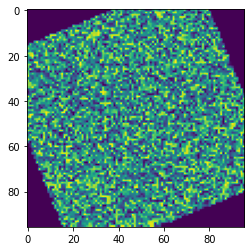

In [7]:
## dummy transform 
dummy2_transform = transforms.Compose(
    [transforms.RandomRotation(45), transforms.RandomVerticalFlip()])

dummy2_result = dummy2_transform(image)

plt.imshow(dummy2_result)

## Exploring the Data

Let's check what the data contain, use matplotlib to print out some images from the dataset. With a bit of numpy we can convert them and print the entire batch.

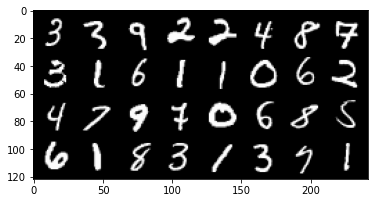

In [8]:
# function to show an image
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))


# get some random images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show 
imshow(torchvision.utils.make_grid(images))

What are the dimensions?

In [9]:
for images, labels in trainloader:
  print("Image Batch Dimensions:", images.shape)
  print("Image label Dimensions:", labels.shape)

  break

Image Batch Dimensions: torch.Size([32, 1, 28, 28])
Image label Dimensions: torch.Size([32])


## The Model
Now we will build the deep learning model that will do the image classification. We will keep things simple and stack a few dense layers and a dropout layer to train our model.

  1. The Following structure involves a `class` is a standard code that's used to build the neural netowrk in PyTorch:



```python
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        
        # layers go here
    
    def forward(self, x):
        
        # computations go here
```
- The layers are defined inside `def __init__()`. `super(...).__init__()` is just there to stick things together. For our model, we stack a hidden layer (`self.d1`) followed by a dropout layer (`self.dropout`), which is then followed by an output layer (`self.d2`). 
- `nn.Linear(...)` defines the dense layer and it requires the `in` and `out` dimensions, which corresponds to the size of the input feature and output feature of that layer, respectively. 
- `nn.Dropout(...)` is used to define a dropout layer. Dropout is an approach in deep learning that helps a model to avoid overfitting. This means that dropout acts as a regularization technique that helps the model to not overfit on the images it has seen while training. We want this because we need a model that generalizes well to unseen examples -- in our case, the testing dataset. Dropout randomly zeroes some of the units of the neural network layer with probability of `p=0.2`. Read more about the dropout layer [here](https://pytorch.org/docs/stable/nn.html#dropout). 
- The entry point of the model, i.e. where the data enters, is placed under the `forward(...)` function. Typically, we also place other transformations we perform on the data while training inside this function. 
- In the `forward()` function we are performing a series of computations on the input data
    - we flatten the images first, converting it from 2D (`28 X 28`) to 1D (`1 X 784`).
    - then we feed the batches of those 1D images into the first hidden layer
    - the output of that hidden layer is then applied a [non-linear activate function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) called `ReLU`. It's not so important to know what `F.relu()` does at the moment, but the effect that it achieves is that it allows faster and more effective training of neural architectures on large datasets
    - as explained above, the dropout also helps the model to train more efficiently by avoiding overfitting on the training data
    - we then feed the output of that dropout layer into the output layer (`d2`)
    - the result of that is then fed to the [softmax function](https://en.wikipedia.org/wiki/Softmax_function), which converts or normalized the output into a probability distribution which helps with outputting proper predictions values that are used to calculate the accuracy of the model; this will the final output of the model

In [11]:
## the model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.d1 = nn.Linear(28 * 28, 128)
        self.dropout = nn.Dropout(p=0.2)
        self.d2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.flatten(start_dim = 1)
        x = self.d1(x)
        x = F.relu(x)
        x = self.dropout(x)
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out

Visually, the following is a diagram of the model we built. The hidden layer is much bigger , it's just an approximation

In [12]:
## test the model with 1 batch
model = MyModel()
for images, labels in trainloader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([32, 1, 28, 28])
torch.Size([32, 10])


We can clearly see that we get back the batches with 10 output values associate with it. These are used to compute the performance of the model. 

## Training the Model
Now we are ready to train the model but before that we are going to setup a loss function, an optimizer and a function to compute accuracy of the model. 

- The `learning_rate` is the rate at which the model will try to optimize its weights, which is just another parameter for the model. 
- `num_epochs` is the number of training steps. 
- `device` determines what hardware we will use to train the model. If a `gpu` is present, then that will be used, otherwise it defaults to the `cpu`.
- `model` is just the model instance.
- `model.to(device)` is in charge of setting the actaull device that will be used for training the model
- `criterion` is just the metric that's used to compute the loss of the model while it forward and backward trains to optimize its weights. 
- `optimizer` is the optimization technique used to modify the weights in the backward propagation. Notice that it requires the `learning_rate` and the model parameters which are part of the calculation to optimize weights.


In [13]:
learning_rate = 0.001
num_epochs = 5

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MyModel()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

The utility function below helps to calculate the accuracy of the model. For now, it's not important to understand how it's calculated but basically it compares the outputs of the model (predictions) with the actual target values (i.e., the labels of the dataset), and tries to compute the average of correct predictions.

In [14]:
## utility function to compute accuracy
def get_accuracy(output, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(output, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

## Training the Model
Now it's time to train the model. The code portion that follows can be descrive in the following steps:

- The first thing in training a neural network model is defining the training loop, which is achieved by:

```python
for epoch in range(num_epochs):
    ...
```

- We define two variables, `training_running_loss` and `train_acc` that will help us to monitor the running accuracy and loss of the modes while it trains over the different batches.
- `model.train()` explicitly indicates that we are ready to start training. 
- Notice how we are iterating over the dataloader, which conveniently gives us the batches in image-label pairs. 
- That second `for` loop means that for every training step we will iterate over all the batches and train the model over them.
- We feed the model the images via `model(images)` and the output are the predictions of the model. 
- The predictions together with the target labels are used to compute the loss using the loss function we defined earlier.
- Before we update our weights for the next round of training, we perform the following steps:
    - we use the optimizer object to reset all the gradients for the variables it will update. This is a safe step and it doesn't overwrites the gradients the model accumulates while training (those are stored in a buffer [link text](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#pytorch-optim) via the `loss.backward() call)
    - `loss.backward()` simply computes the gradient of the loss w.r.t to the model parameters
    - `optimizer.step()` then ensures that the model parameters are updated

- Then we gather and accumulate the loss and accuracy, which is what we will use to tell us if the model is learning properly

In [15]:
## train the model
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0

    ## commence training
    model = model.train()

    ## training step
    for i, (images, labels) in enumerate(trainloader):
        
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        predictions = model(images)
        loss = criterion(predictions, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(predictions, labels, BATCH_SIZE)
    
    model.eval()
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.2f' \
          %(epoch, train_running_loss / i, train_acc/i)) 

Epoch: 0 | Loss: 1.5971 | Train Accuracy: 88.57
Epoch: 1 | Loss: 1.5285 | Train Accuracy: 94.00
Epoch: 2 | Loss: 1.5136 | Train Accuracy: 95.32
Epoch: 3 | Loss: 1.5048 | Train Accuracy: 96.11
Epoch: 4 | Loss: 1.5004 | Train Accuracy: 96.50


After all the training steps are over, we can clearly see that the loss keeps decreasing while the training accuracy of the model keeps rising, which is a good sign that the model is effectively learning to classify images.

We can verify that by computing the accuracy on the testing dataset to see how well the model performs on the image classificaiton task. As you can see below, our basic CNN model is performing very well on the MNIST classification task.

In [16]:
test_acc = 0.0
for i, (images, labels) in enumerate(testloader, 0):
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    test_acc += get_accuracy(outputs, labels, BATCH_SIZE)
        
print('Test Accuracy: %.2f'%( test_acc/i))

Test Accuracy: 97.07


## Summary
This is a long tutorial that aims to give a very basic introdction to the fundamentals of image classification using Neural Networks and PyTorch.